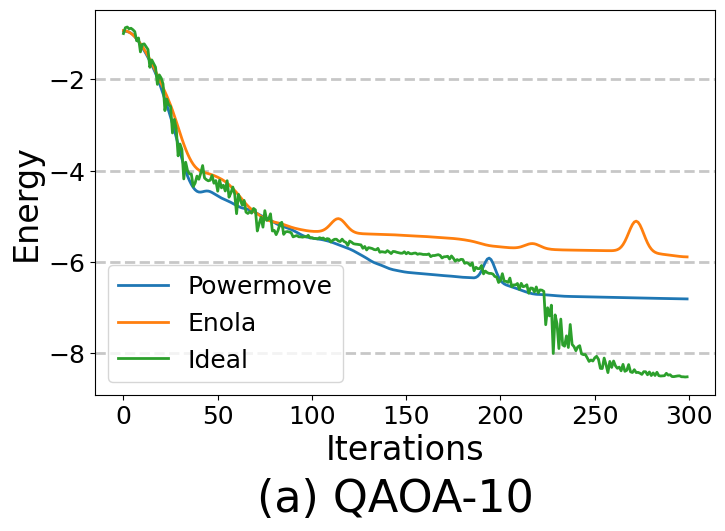

In [1]:
# Figure 9(a)

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

plt.rcParams.update({
    'legend.fontsize': 18,
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'lines.linewidth': 2.0,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'grid.alpha': 0.7,
    'grid.linestyle': '--'
})

plt.figure(figsize=(8,5))
with open("data/vqa_energy_10qubits.txt", 'r') as file:
    energy_history0 = eval(file.readline(), {"np": np})
    energy_history1 = eval(file.readline(), {"np": np})
    energy_history2 = eval(file.readline(), {"np": np})

plt.plot(range(300), gaussian_filter1d(energy_history0[0: 300], sigma=3), label='Powermove', linewidth=2, color = 'C0')
plt.plot(range(300), gaussian_filter1d(energy_history1[0: 300], sigma=4), label='Enola', linewidth=2, color = 'C1')
plt.plot(range(300), energy_history2[0: 300], label='Ideal', linewidth=2, color = 'C2')
plt.grid(axis='y', linestyle='--', linewidth=2) 
plt.xlabel(r"Iterations")
plt.ylabel(r"Energy")
plt.legend(loc='lower left')
plt.figtext(0.5, -0.10, '(a) QAOA-10', ha='center', va='center', fontsize=32)
plt.savefig("fig/vqa_energy10.pdf",  bbox_inches='tight')

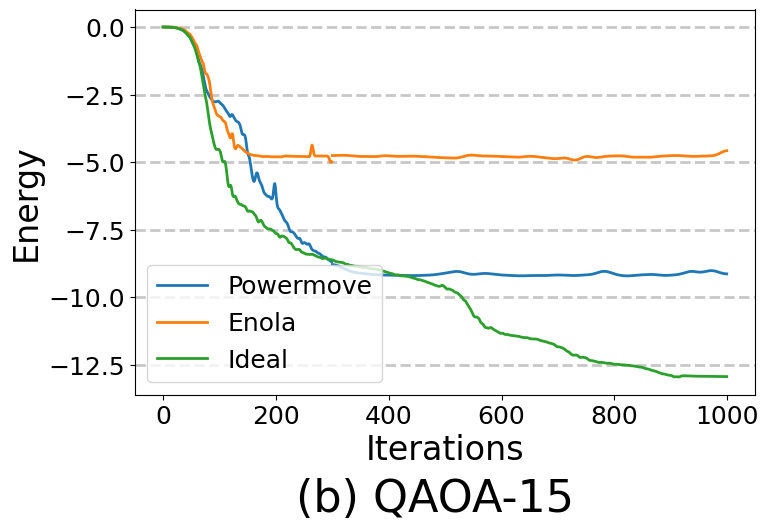

In [2]:
# Figure 9(b)

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

plt.rcParams.update({
    'legend.fontsize': 18,
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'lines.linewidth': 2.0,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'grid.alpha': 0.7,
    'grid.linestyle': '--'
})

plt.figure(figsize=(8,5))
with open("data/vqa_energy_15qubits.txt", 'r') as file:
    energy_history0 = eval(file.readline(), {"np": np})
    energy_history1 = eval(file.readline(), {"np": np})
    energy_history2 = eval(file.readline(), {"np": np})

plt.plot(range(300), gaussian_filter1d(energy_history0[0: 300], sigma=2), label='Powermove', linewidth=2, color = 'C0')
plt.plot(range(300, 1000), gaussian_filter1d(energy_history0[300: 1000], sigma=12), color = 'C0', linewidth=2)
plt.plot(range(300), gaussian_filter1d(energy_history1[0: 300], sigma=2), label='Enola', linewidth=2, color = 'C1')
plt.plot(range(300, 1000), gaussian_filter1d(energy_history1[300: 1000], sigma=11), color = 'C1', linewidth=2)
plt.plot(range(1000), gaussian_filter1d(energy_history2[0: 1000], sigma=2), label='Ideal', linewidth=2, color = 'C2')
plt.grid(axis='y', linestyle='--', linewidth=2) 
plt.xlabel(r"Iterations")
plt.ylabel(r"Energy")
plt.legend(loc='lower left')
plt.figtext(0.5, -0.10, '(b) QAOA-15', ha='center', va='center', fontsize=32)
plt.savefig("fig/vqa_energy15.pdf",  bbox_inches='tight')

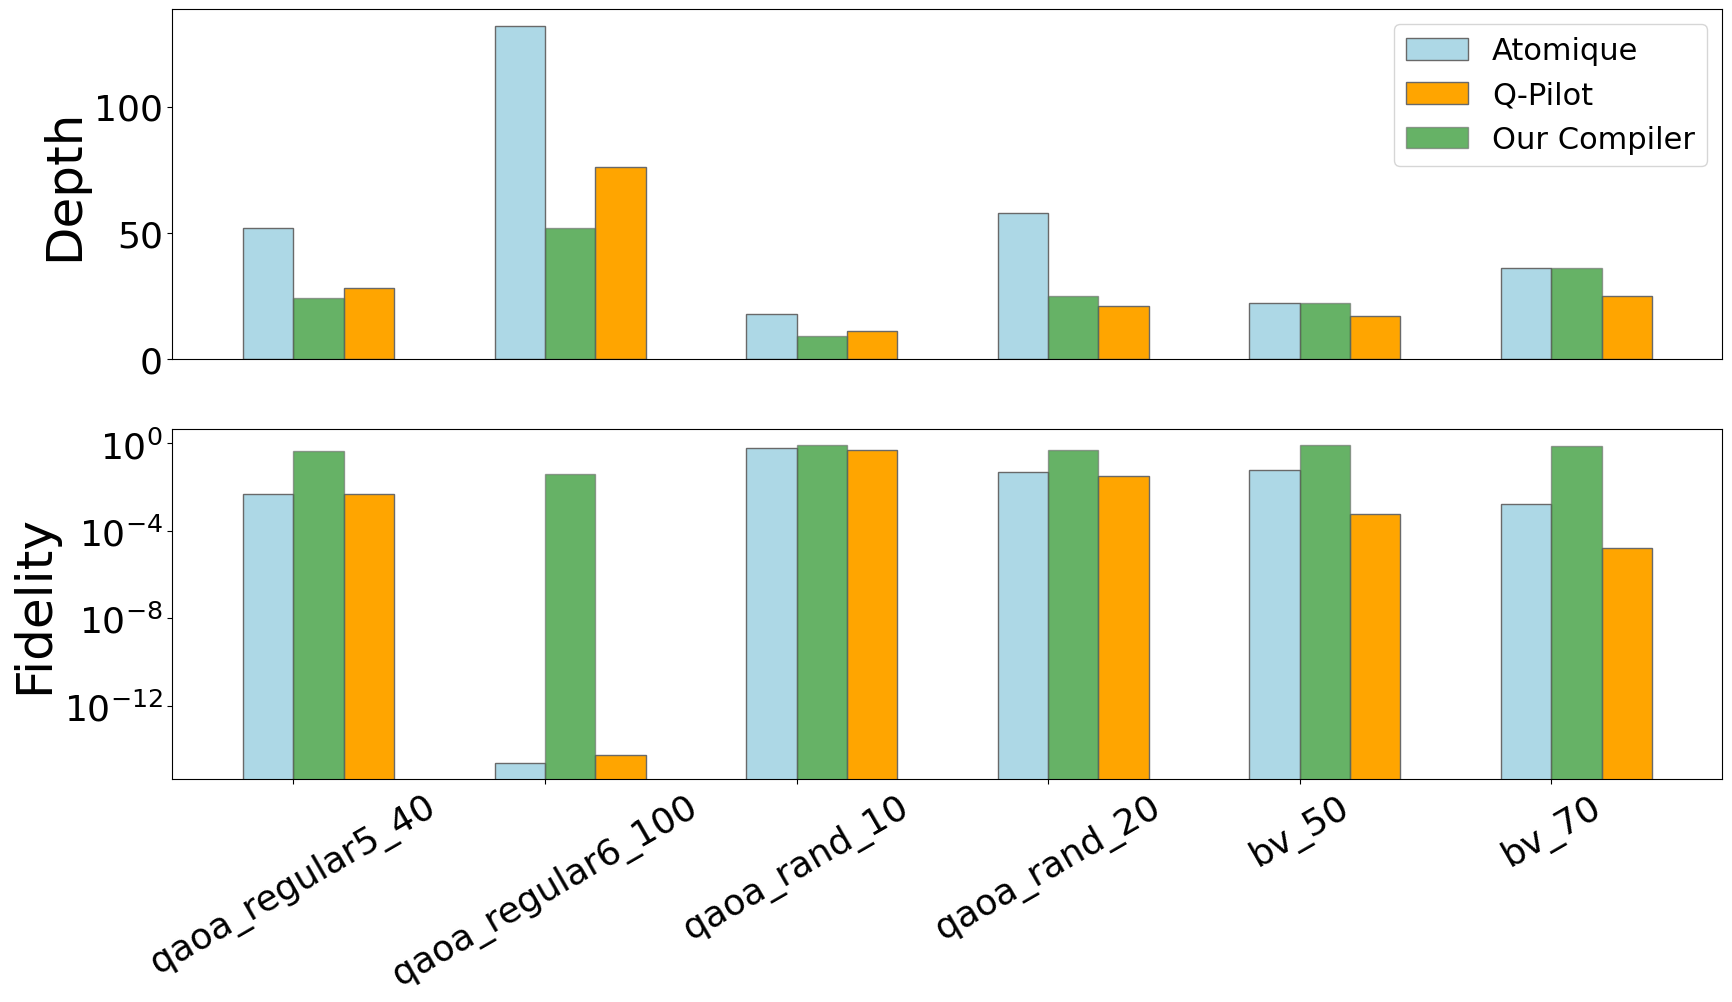

In [3]:
# Figure 8(a)

import matplotlib.pyplot as plt
# compare with other compiler (q-pilot and atomique)
plt.rcParams.update({
    'legend.fontsize': 22,
    'axes.labelsize': 36,
    'axes.titlesize': 36,
    'lines.linewidth': 2.0,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'grid.alpha': 0.7,
    'grid.linestyle': '--'
})
atomique_data = {}
with open("data/atomique_data.txt", 'r') as file:
    benchmark_data = file.readline().split(' ')
    while len(benchmark_data) > 1:
        atomique_data[benchmark_data[0]] = (eval(benchmark_data[1]), eval(benchmark_data[2]))
        benchmark_data = file.readline().split(' ')

qpilot_data = {}
with open("data/q-pilot_data.txt", 'r') as file:
    benchmark_data = file.readline().split(' ')
    while len(benchmark_data) > 1:
        qpilot_data[benchmark_data[0]] = (eval(benchmark_data[1]), eval(benchmark_data[2]))
        benchmark_data = file.readline().split(' ')

mvqc_data = {}
tags = ['qaoa_regular5', 'qaoa_regular6', 'qaoa_random', 'bv']
for tag in tags:
    with open('data/' + tag + "_storage_compare_multi_aod.txt", 'r') as file:
        NAOD_list = eval(file.readline())
        for i in NAOD_list:
            if i == 4:
                N_Qubit_List = eval(file.readline())
                mvqc_transfer_duration_list = eval(file.readline()) 
                mvqc_move_duration_list = eval(file.readline()) 
                mvqc_cir_fidelity_list = eval(file.readline()) 
                mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
                mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
                mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
                mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
                mvqc_cir_fidelity_coherence_list = eval(file.readline())
                mvqc_nmoves = eval(file.readline())
                for i in range(len(N_Qubit_List)):
                    if tag + '_' + str(N_Qubit_List[i]) in atomique_data.keys():
                        mvqc_data[tag + '_' + str(N_Qubit_List[i])] = (mvqc_nmoves[i], mvqc_cir_fidelity_list[i])
            else:
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())


import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10)) 
categories = list(mvqc_data.keys())


data_list1 = []
data_list2 = []
data_list3 = []

for c in categories:
    data_list1.append(atomique_data[c][0])
    data_list2.append(mvqc_data[c][0])
    data_list3.append(qpilot_data[c][0])

for c in range(len(categories)):
    ca = categories[c].split('_')
    if len(ca) > 2:
        if ca[1] == 'random':
            categories[c] = ca[0] + '_' + 'rand_' + ca[2]
bar_width = 1
index = np.arange(len(categories)) * 5
ax1.bar(index, data_list1, bar_width, label='Atomique', color = 'lightblue', edgecolor='dimgray')
ax1.bar(index + bar_width * 2, data_list3, bar_width, label='Q-Pilot', color = 'orange', edgecolor='dimgray')
ax1.bar(index + bar_width, data_list2, bar_width, label='Our Compiler', color = 'green', alpha = 0.6, edgecolor='dimgray')

ax1.set_ylabel('Depth')
ax1.set_xticks([])
ax1.legend()

categories = list(mvqc_data.keys())

data_list1 = []
data_list2 = []
data_list3 = []

for c in categories:
    data_list1.append(atomique_data[c][1])
    data_list2.append(mvqc_data[c][1])
    data_list3.append(qpilot_data[c][1])

for c in range(len(categories)):
    ca = categories[c].split('_')
    if len(ca) > 2:
        if ca[1] == 'random':
            categories[c] = ca[0] + '_' + 'rand_' + ca[2]
bar_width = 1
index = np.arange(len(categories)) * 5
ax2.bar(index, data_list1, bar_width, label='Atomique', color = 'lightblue', edgecolor='dimgray')
ax2.bar(index + bar_width * 2, data_list3, bar_width, label='Q-Pilot', color = 'orange', edgecolor='dimgray')
ax2.bar(index + bar_width, data_list2, bar_width, label='Our Compiler', color = 'green', alpha = 0.6, edgecolor='dimgray')


ax2.set_ylabel('Fidelity')
ax2.set_xticks(index + bar_width / 2, categories, rotation=30, fontsize=26)
ax2.set_yscale('log')

ax1.tick_params(axis='y', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
plt.subplots_adjust(hspace=0.2) 


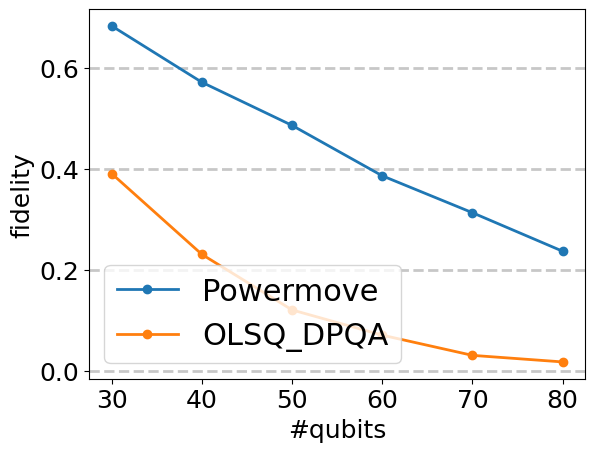

In [4]:
# Figure 8(b)

import numpy as np
# compare with tan-solver
with open("data/tan_solver.txt", 'r') as file:
    num_qubits = eval(file.readline())
    fidelity_OLSQ = eval(file.readline())
    fidelity_Our = eval(file.readline())

plt.plot(num_qubits, fidelity_Our, label='Powermove', linewidth=2, marker='o')
plt.plot(num_qubits, fidelity_OLSQ, label='OLSQ_DPQA', linewidth=2, marker='o')
plt.grid(axis='y', linestyle='--', linewidth=2) 
plt.xlabel(r"#qubits", fontsize=18)
plt.ylabel(r"fidelity", fontsize=18)
plt.legend(loc='lower left')

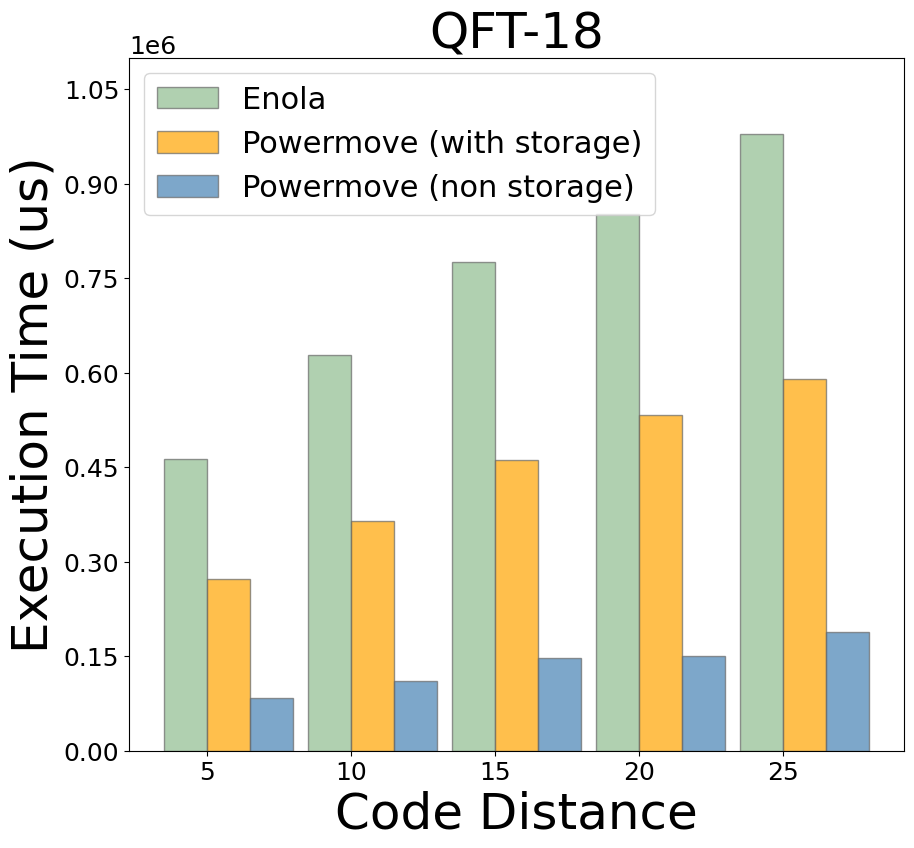

In [5]:
# Figure 10(a)

with open("data/fault_tolerant_compare_qft.txt", 'r') as file:
    Distance_List = eval(file.readline())
    mvqc_transfer_duration_list = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nstage_list = eval(file.readline())

    enola_transfer_duration_list = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nstage_list = eval(file.readline())

    no_storage_transfer_duration_list = eval(file.readline()) 
    no_storage_move_duration_list = eval(file.readline()) 
    no_storage_cir_fidelity_list = eval(file.readline()) 
    no_storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    no_storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    no_storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    no_storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    no_storage_cir_fidelity_coherence_list = eval(file.readline())
    no_storage_nstage_list = eval(file.readline())

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

colors = ['darkseagreen', 'orange', 'steelblue', 'darkseagreen']



bar_width = 25000
bar_spacing = 9000

bar_positions_set1 = np.arange(len(Distance_List)) * (bar_width * 3 + bar_spacing) + bar_spacing
bar_positions_set2 = bar_positions_set1 + bar_width
bar_positions_set3 = bar_positions_set2 + bar_width

plt.figure(figsize=(10, 9))

plt.bar(bar_positions_set1, np.array([enola_move_duration_list[k] + enola_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Enola', alpha=0.7, color=colors[0], edgecolor='dimgray')
plt.bar(bar_positions_set2, np.array([mvqc_move_duration_list[k] + mvqc_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Powermove (with storage)', alpha=0.7, color=colors[1], edgecolor='dimgray')
plt.bar(bar_positions_set3, np.array([no_storage_move_duration_list[k] + no_storage_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Powermove (non storage)', alpha=0.7, color=colors[2], edgecolor='dimgray')
plt.ylim(0, 1100000)
plt.title('QFT-18')
plt.xticks()
plt.yticks()
plt.xlabel('Code Distance')
plt.ylabel('Execution Time (us)')
plt.legend(bbox_to_anchor=(0.7, 0.52))
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks((bar_positions_set1 + bar_positions_set2) / 2, np.array(Distance_List))

plt.savefig("fig/qt_qft.pdf",  bbox_inches='tight')
plt.show()

# print(np.mean([x / y for x, y in zip([enola_move_duration_list[k] + enola_transfer_duration_list[k] for k in range(len(Distance_List))], [no_storage_move_duration_list[k] + no_storage_transfer_duration_list[k] for k in range(len(Distance_List))])]))
# print(np.mean([x / y for x, y in zip([enola_move_duration_list[k] + enola_transfer_duration_list[k] for k in range(len(Distance_List))], [mvqc_move_duration_list[k] + mvqc_transfer_duration_list[k] for k in range(len(Distance_List))])]))

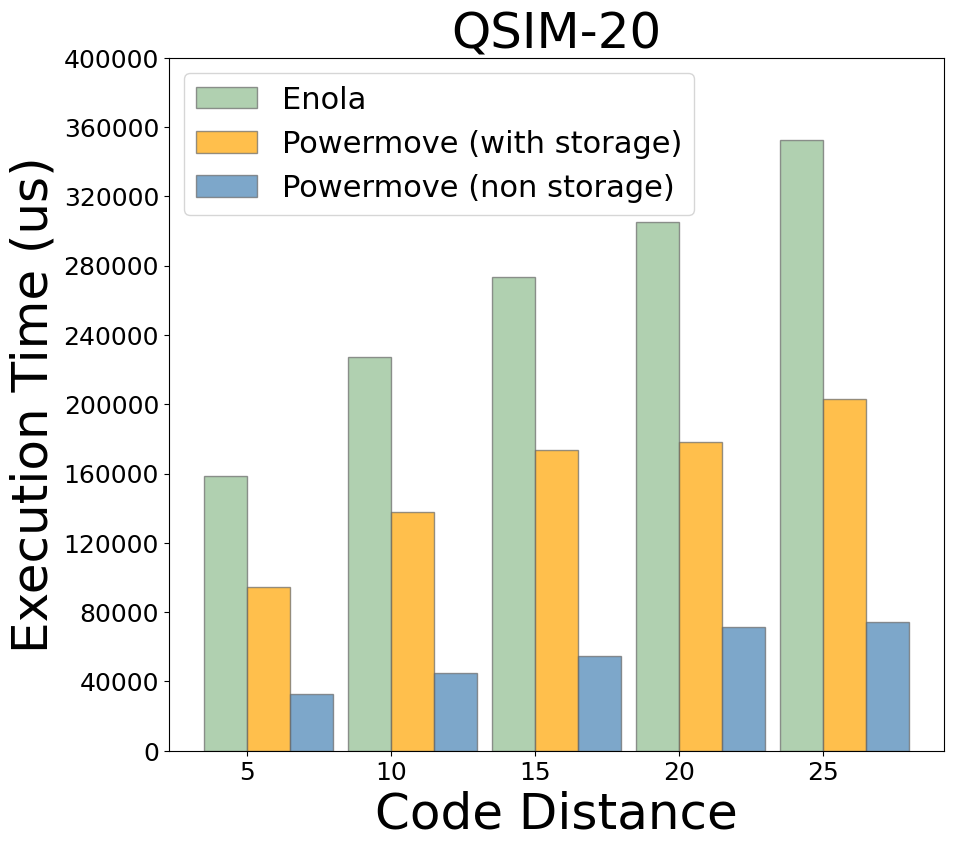

In [6]:
# Figure 10(b)

with open("data/fault_tolerant_compare_qsim.txt", 'r') as file:
    Distance_List = eval(file.readline())
    mvqc_transfer_duration_list = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nstage_list = eval(file.readline())

    enola_transfer_duration_list = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nstage_list = eval(file.readline())

    no_storage_transfer_duration_list = eval(file.readline()) 
    no_storage_move_duration_list = eval(file.readline()) 
    no_storage_cir_fidelity_list = eval(file.readline()) 
    no_storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    no_storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    no_storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    no_storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    no_storage_cir_fidelity_coherence_list = eval(file.readline())
    no_storage_nstage_list = eval(file.readline())

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

colors = ['darkseagreen', 'orange', 'steelblue', 'darkseagreen']

plt.figure(figsize=(10, 9))

bar_width = 25000
bar_spacing = 9000

bar_positions_set1 = np.arange(len(Distance_List)) * (bar_width * 3 + bar_spacing) + bar_spacing
bar_positions_set2 = bar_positions_set1 + bar_width
bar_positions_set3 = bar_positions_set2 + bar_width

# fig, ax = plt.subplots()

plt.bar(bar_positions_set1, np.array([enola_move_duration_list[k] + enola_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Enola', alpha=0.7, color=colors[0], edgecolor='dimgray')
plt.bar(bar_positions_set2, np.array([mvqc_move_duration_list[k] + mvqc_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Powermove (with storage)', alpha=0.7, color=colors[1], edgecolor='dimgray')
plt.bar(bar_positions_set3, np.array([no_storage_move_duration_list[k] + no_storage_transfer_duration_list[k] for k in range(len(Distance_List))]), width=bar_width, label='Powermove (non storage)', alpha=0.7, color=colors[2], edgecolor='dimgray')

plt.title('QSIM-20')
plt.xticks()
plt.yticks()
plt.ylim(0, 400000)
plt.xlabel('Code Distance')
plt.ylabel('Execution Time (us)')
plt.legend(bbox_to_anchor=(0.7, 0.52))
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks((bar_positions_set1 + bar_positions_set2) / 2, np.array(Distance_List))

plt.savefig("fig/qt_qsim.pdf",  bbox_inches='tight')
plt.show()